In [1]:
from lib.config import Config_f
from lib.data_set import Features
from lib.model import SimpleModel
from lib import utils

In [2]:
import imp
imp.reload(utils)

<module 'lib.utils' from 'E:\\Document\\jupyter\\Master Thesis\\lib\\utils.py'>

In [19]:
import ctypes
import pandas as pd
import numpy as np
import pywt
import matplotlib.pyplot as plt

from sklearn.preprocessing import OneHotEncoder, StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest,f_classif,chi2,mutual_info_classif,VarianceThreshold,RFE,SelectFromModel
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn import metrics

import xgboost as xgb
from xgboost import plot_importance
from imblearn.over_sampling import SMOTE,BorderlineSMOTE

## File name read

In [4]:
# read file name of data with various Labels
df = pd.read_csv('./useful_data_label.csv',index_col=0) 
# read file name of data with only label 0
df2 = pd.read_csv('./unuseful_data_label.csv',index_col=0)
# read some of the data with only label 0
df3 = pd.read_csv('./data/file_name.txt',header=None)
player = ctypes.windll.kernel32

ind = df2.iloc[1].isna()
files = np.concatenate([np.array(df.columns),np.array('normal/'+df2.columns[ind])])

## Configuration

In [108]:
# Override the base class of Config and Features for XGBoost Model
class XGB_Config(Config_f):
    NAME = 'XGBoost'
    NUM_CLASSES = 2

    CLASS_WEIGHTS = None
    FN_LP = 300
    FN_HP = None
    FN_IR = False
    DETREND_LAMBDA = 50
    DROP_WITH_ZSCORE = None
    REMOVE_FREQS = True
    TEST_FILES = files[[5,30,31,32,33,34,35]]
    SHUFFLE=True
    
    # XGBoost parameters
    N_EST = 500
    MAX_DEPTH = 3
    LR = 0.1
    SUBSAMPLE = 0.9
    REG_LAMBDA = 25
    
class XGB_dataset(Features):
    
    def __init__(self,config):
        super(XGB_dataset,self).__init__(config)
        self.config = config
        

In [109]:
# Generate XGBoost configuration
config = XGB_Config()
config.display()


Configurations:
BINS                           3
CHANNELS                       ['LEFT_TA', 'LEFT_TS', 'LEFT_BF', 'LEFT_RF', 'RIGHT_TA', 'RIGHT_TS', 'RIGHT_BF', 'RIGHT_RF']
CLASS_WEIGHTS                  None
DETREND_LAMBDA                 50
DROP_WITH_ZSCORE               None
FEATURES_LIST                  ['IEMG', 'SSI', 'WL', 'ZC', 'ku', 'SSC', 'skew', 'Acti', 'AR', 'HIST', 'MDF', 'MNF', 'mDWT']
FN_HP                          None
FN_IR                          False
FN_LP                          300
LEVEL_DWT                      3
LR                             0.1
MAX_DEPTH                      3
NAME                           XGBoost
NUM_CLASSES                    2
NUM_MF                         3
N_ENV                          20
N_EST                          500
RANGES                         (-3, 3)
RECT                           False
REG_LAMBDA                     25
REMOVE_FREQS                   True
SAME_LABEL                     True
SCALE                          

## Data generate

In [110]:
data = XGB_dataset(config)

In [111]:
# Choose features to use
data.feature_list = ['IEMG', 'SSI', 'WL', 'ZC', 'ku', 'SSC', 'skew', 'Acti', 'AR', 'HIST', 'MF','MDF', 'MNF', 'mDWT']
data.num_mf = 10

# Load data from files
data.load_data(files)

# Extract features from data
data.extract_features()

X_train,Y_train,F1 = data.train_set
X_valid,Y_valid,F2 = data.valid_set
X_test, Y_test, F3 = data.test_set

skip
skip
3/174: G06_FoG_trial_1_emg.csv
4/174: G06_FoG_trial_2_emg.csv
5/174: G06_FoG_trial_3_emg.csv
6/174: G07_Freezing_Trial1_trial_1_emg.csv
7/174: G08_FoG_1_trial_1_emg.csv
8/174: G08_FoG_2_trial_1_emg.csv
9/174: G11_FoG_trial_1_emg.csv
10/174: G11_FoG_trial_2_emg.csv
11/174: P379_M050_2_OFF_A_FoG_trial_1_emg.csv
12/174: P379_M050_2_OFF_A_FoG_trial_2_emg.csv
13/174: P379_M050_2_OFF_A_FoG_trial_3_emg.csv
14/174: P379_M050_2_OFF_B_FoG_trial_1_emg.csv
15/174: P379_M050_2_OFF_B_FoG_trial_2_emg.csv
16/174: P379_M050_2_OFF_B_FoG_trial_3_emg.csv
17/174: P551_M050_2_A_FoG_trial_1_emg.csv
18/174: P551_M050_2_B_FoG_trial_1_emg.csv
19/174: P551_M050_2_B_FoG_trial_2_emg.csv
20/174: P812_M050_2_B_FoG_trial_1_emg.csv
21/174: P812_M050_2_B_FoG_trial_2_emg.csv
22/174: normal/G02_Walking_trial_1_emg.csv
23/174: normal/G03_Walking_trial_1_emg.csv
24/174: normal/G03_Walking_trial_2_emg.csv
25/174: normal/G05_Walking_struct_fixed_trial_1_emg.csv
26/174: normal/G05_Walking_struct_fixed_trial_2_emg.cs

171/174: normal/P940_MSham_A_Walking_trial_6_emg.csv
172/174: normal/P940_MSham_B_Walking_trial_2_emg.csv
173/174: normal/P940_MSham_B_Walking_trial_4_emg.csv
174/174: normal/P940_MSham_B_Walking_trial_6_emg.csv
threshold_WAMP:1.0, threshold_ZC:0.0, threshold_SSC:0.0, bins:3, ranges:(-3,3), num_mf:10, wavelet: db7, level: 3
['IEMG', 'SSI', 'WL', 'ZC', 'ku', 'SSC', 'skew', 'Acti', 'AR', 'HIST', 'MF', 'MDF', 'MNF', 'mDWT']
threshold_WAMP:1.0, threshold_ZC:0.0, threshold_SSC:0.0, bins:3, ranges:(-3,3), num_mf:10, wavelet: db7, level: 3
['IEMG', 'SSI', 'WL', 'ZC', 'ku', 'SSC', 'skew', 'Acti', 'AR', 'HIST', 'MF', 'MDF', 'MNF', 'mDWT']
threshold_WAMP:1.0, threshold_ZC:0.0, threshold_SSC:0.0, bins:3, ranges:(-3,3), num_mf:10, wavelet: db7, level: 3
['IEMG', 'SSI', 'WL', 'ZC', 'ku', 'SSC', 'skew', 'Acti', 'AR', 'HIST', 'MF', 'MDF', 'MNF', 'mDWT']


In [112]:
X=np.concatenate([X_train,X_valid,X_test])
Y=np.concatenate([Y_train,Y_valid,Y_test])
F=np.concatenate([F1,F2,F3])

## Model

In [71]:
# Override base class of SimpleMode for XGBoost
class XGB_Model(SimpleModel):
    
    def build(self,config):
        
        if config.NUM_CLASSES > 2:
            model = xgb.XGBClassifier(max_depth=config.MAX_DEPTH, 
                              learning_rate=config.LR, 
                              n_estimators=config.N_EST, 
                              objective='multi:softmax',
                              num_calss=config.NUM_CLASSES,
                              subsample=config.SUBSAMPLE,
                              reg_lambda = config.REG_LAMBDA,
                              #reg_alpha = 3,
                              **config.PARA
                             )
        else:
            model = xgb.XGBClassifier(max_depth=config.MAX_DEPTH, 
                              learning_rate=config.LR, 
                              n_estimators=config.N_EST, 
                              objective='binary:logistic',
                              scale_pos_weight = config.CLASS_WEIGHTS,
                              subsample=config.SUBSAMPLE,
                              reg_lambda = config.REG_LAMBDA,
                              #reg_alpha = 3,
                              **config.PARA
                             )
        
        if config.CLASS_WEIGHTS != None:
            print('Using class weights: 1:',config.CLASS_WEIGHTS)
        
        return model
    
    def train(self, train_dataset, val_dataset, transformer=None):
        
        self.X_train = train_dataset[0]
        self.scaler = MinMaxScaler()
#         self.scaler = StandardScaler()
        X_train = self.scaler.fit_transform(train_dataset[0])
        
#         scaler.fit(np.concatenate([train_dataset[0],val_dataset[0]]))
#         X_val = scaler.transform(val_dataset[0])
        X_val = self.scaler.transform(val_dataset[0])
        
        if transformer != None:
            self.transformer = transformer
            self.transformer.fit(X_train,train_dataset[1])
            X_train = self.transformer.transform(X_train)
            X_val = self.transformer.transform(X_val)
        else:
            self.transformer = None
         
        metric = 'merror' if self.config.NUM_CLASSES > 2 else 'error'
#         metric = 'auc'
            
        eval_set=[(X_train,train_dataset[1]),(X_val,val_dataset[1])]
        self.simple_model.fit(X_train, train_dataset[1],eval_metric=[metric],
                              eval_set=eval_set,
                              early_stopping_rounds=30
                             )
        
#         self.X_train = train_dataset[0]
#         scaler = MinMaxScaler()
#         # scaler = StandardScaler()
#         X_train = scaler.fit_transform(train_dataset[0])
        
#         scaler.fit(np.concatenate([train_dataset[0],val_dataset[0]]))
#         X_val = scaler.transform(val_dataset[0])
        
#         if transformer != None:
#             self.transformer = transformer
#             self.transformer.fit(X_train,train_dataset[1])
#             X_train = self.transformer.transform(X_train)
#             X_val = self.transformer.transform(X_val)
#         else:
#             self.transformer = None

#         eval_set=[(X_train,train_dataset[1]),(X_val,val_dataset[1])]
#         self.simple_model.fit(X_train, train_dataset[1],eval_metric=[metric],
#                               eval_set=eval_set,
#                               early_stopping_rounds=30
#                              )
        
    def predict(self, data):
        
        data = np.array(data)
#         scaler = MinMaxScaler()
#         scaler.fit(np.concatenate([self.X_train,data]))
        X = self.scaler.transform(data)
        if self.transformer != None:
            X = self.transformer.transform(X)
        results = self.simple_model.predict(X)

        return results

    def model_metrics(self,data,label):
        pred = self.predict(data)
        acc = metrics.accuracy_score(label,pred)
        cm = metrics.confusion_matrix(label,pred)
        f1 = metrics.f1_score(label,pred,average='macro')
        return acc,cm,f1

## Data split

In [135]:
# data split and processing for model
class_id = [1,2,6]
binary = False
# x_train,y_train,x_valid,y_valid,x_test,y_test = utils.data_split((X_train,X_valid,X_test),
#                                                                  (Y_train,Y_valid,Y_test),
#                                                                  class_id,
#                                                                  binary,
#                                                                  random_state = 555)

test_fold = [-1]*len(F)
for i,f in enumerate(F):
    if f in files[[5,30,31,32,33,34,35]]:
        test_fold[i]=0
    if f in files[[6,50,51,52,53,54,55]]:
        test_fold[i]=1
    if f in files[[7,40,41,42,43,44,45]]:
        test_fold[i]=2

fn=0
ind1=np.array(test_fold)==-1
ind2=(np.array(test_fold)!=-1) & (np.array(test_fold)!=fn)
ind3=np.array(test_fold)==fn
x_train,y_train,x_valid,y_valid,x_test,y_test = utils.data_split((X[ind1],X[ind2],X[ind3]),
                                    (Y[ind1],Y[ind2],Y[ind3]),
                                    class_id,
                                    binary,
                                    random_state = 555)

## Model training

In [77]:
if binary:
    config.CLASS_WEIGHTS = 9
    config.NUM_CLASSES = 2
else:
    config.CLASS_WEIGHTS = None
    config.NUM_CLASSES = len(class_id)
    
config.MAX_DEPTH = 3
config.LR = 0.1
config.SUBSAMPLE = 0.5
config.REG_LAMBDA = 27
config.PARA={'colsample_bytree':0.5}
config.N_EST = 300

# Generate XGBoost Model
xgb_model = XGB_Model('XGB',config,'./model/XGB/')

Using class weights: 1: 9


In [78]:
sm = BorderlineSMOTE(random_state=50)
x_full,y_full = sm.fit_resample(x_train,y_train)

In [79]:
pca = PCA(n_components=140,copy=True)
sfm = SelectFromModel(GradientBoostingClassifier(),max_features=120)
rfe = RFE(estimator=LogisticRegression(max_iter=10000), n_features_to_select=80)
vt = VarianceThreshold(threshold=0.01)

xgb_model.train((x_train,y_train),(x_valid,y_valid),pca)

[0]	validation_0-error:0.11200	validation_1-error:0.11288
Multiple eval metrics have been passed: 'validation_1-error' will be used for early stopping.

Will train until validation_1-error hasn't improved in 30 rounds.
[1]	validation_0-error:0.11054	validation_1-error:0.10904
[2]	validation_0-error:0.09666	validation_1-error:0.08932
[3]	validation_0-error:0.08496	validation_1-error:0.08548
[4]	validation_0-error:0.09300	validation_1-error:0.09260
[5]	validation_0-error:0.08314	validation_1-error:0.08274
[6]	validation_0-error:0.07765	validation_1-error:0.08110
[7]	validation_0-error:0.06687	validation_1-error:0.06959
[8]	validation_0-error:0.06212	validation_1-error:0.06356
[9]	validation_0-error:0.06194	validation_1-error:0.06520
[10]	validation_0-error:0.06413	validation_1-error:0.06575
[11]	validation_0-error:0.05902	validation_1-error:0.06520
[12]	validation_0-error:0.05664	validation_1-error:0.06247
[13]	validation_0-error:0.05335	validation_1-error:0.06027
[14]	validation_0-error

[136]	validation_0-error:0.01151	validation_1-error:0.02082
[137]	validation_0-error:0.01169	validation_1-error:0.02082
[138]	validation_0-error:0.01133	validation_1-error:0.02137
[139]	validation_0-error:0.01133	validation_1-error:0.01973
[140]	validation_0-error:0.01151	validation_1-error:0.01973
[141]	validation_0-error:0.01115	validation_1-error:0.02027
[142]	validation_0-error:0.01133	validation_1-error:0.01973
[143]	validation_0-error:0.01096	validation_1-error:0.02027
[144]	validation_0-error:0.01096	validation_1-error:0.02027
[145]	validation_0-error:0.01096	validation_1-error:0.02027
[146]	validation_0-error:0.01060	validation_1-error:0.02027
[147]	validation_0-error:0.01060	validation_1-error:0.02027
[148]	validation_0-error:0.01042	validation_1-error:0.02082
[149]	validation_0-error:0.01023	validation_1-error:0.02027
[150]	validation_0-error:0.01023	validation_1-error:0.01973
[151]	validation_0-error:0.01042	validation_1-error:0.01863
[152]	validation_0-error:0.01023	validat

## Model evaluation

In [80]:
acc_train,cm_train,f1_train = xgb_model.model_metrics(x_train,y_train)
acc_valid,cm_valid,f1_valid = xgb_model.model_metrics(x_valid,y_valid)
acc_test,cm_test,f1_test = xgb_model.model_metrics(x_test,y_test)
print('acc_train: %f\nf1_train: %f\nconfusion_matrix:\n'%(acc_train,f1_train),cm_train,'\n')
print('acc_valid: %f\nf1_valid: %f\nconfusion_matrix:\n'%(acc_valid,f1_valid),cm_valid,'\n')
print('acc_test: %f\nf1_test: %f\nconfusion_matrix:\n'%(acc_test,f1_test),cm_test)

acc_train: 0.995615
f1_train: 0.985413
confusion_matrix:
 [[5013   24]
 [   0  436]] 

acc_valid: 0.985753
f1_valid: 0.954439
confusion_matrix:
 [[1656   20]
 [   6  143]] 

acc_test: 0.748826
f1_test: 0.673132
confusion_matrix:
 [[262  15]
 [ 92  57]]


In [422]:
pd.Series(np.concatenate([Y_train,Y_valid,Y_test])).value_counts()

0    6918
2     392
6     203
1     138
3       1
dtype: int64

In [52]:
pd.Series(np.concatenate([Y_test])).value_counts()

0    285
6     71
1     13
2      9
dtype: int64

In [64]:
pd.Series(np.concatenate([Y_test])).value_counts()

0    284
6     73
1     13
2     11
dtype: int64

In [55]:
temp_y=Y_test
temp_x=data.X3

In [57]:
temp_y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 6, 6, 6, 6, 6, 6, 6, 6,
       6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,
       6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,
       6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [138]:
depth = range(2,10,1)
lr = [0.05,0.1,0.2,0.3,0.4]
lam = [1,5,10,15,20,25,40,60]
accs={}
cms={}
f1={}
for i in depth:
    config.N_EST = 500
    config.MAX_DEPTH = i
    config.LR = 0.1
    config.SUBSAMPLE = 0.9
    config.REG_LAMBDA = 1

    if binary:
        config.CLASS_WEIGHTS = 5
        config.NUM_CLASSES = 2
    else:
        config.CLASS_WEIGHTS = None
        config.NUM_CLASSES = len(class_id)

    # Generate XGBoost Model
    xgb_model = XGB_Model('XGB',config,'./model/XGB/')

    xgb_model.train((x_train,y_train),(x_valid,y_valid),vt)

    acc_train,cm_train = xgb_model.model_metrics(x_train,y_train)
    acc_valid,cm_valid = xgb_model.model_metrics(x_valid,y_valid)
    pred_tr=xgb_model.predict(x_train)
    pred_va=xgb_model.predict(x_valid)
    pred_te=xgb_model.predict(x_test)
    f1_train=f1_score(y_train,pred_tr)
    f1_valid=f1_score(y_valid,pred_va)
    f1_test=f1_score(y_test,pred_te)
    acc_test,cm_test = xgb_model.model_metrics(x_test,y_test)
    accs['depth%d'%i] = (acc_train,acc_valid,acc_test)
    cms['depth%d'%i] = (cm_train,cm_valid,cm_test)
    f1['depth%d'%i] = (f1_train,f1_valid,f1_test)

Using class weights: 1: 5
[0]	validation_0-error:0.05716	validation_1-error:0.07325
Multiple eval metrics have been passed: 'validation_1-error' will be used for early stopping.

Will train until validation_1-error hasn't improved in 30 rounds.
[1]	validation_0-error:0.07029	validation_1-error:0.08491
[2]	validation_0-error:0.05771	validation_1-error:0.07325
[3]	validation_0-error:0.05290	validation_1-error:0.06770
[4]	validation_0-error:0.05198	validation_1-error:0.06604
[5]	validation_0-error:0.04661	validation_1-error:0.05494
[6]	validation_0-error:0.05142	validation_1-error:0.06215
[7]	validation_0-error:0.04643	validation_1-error:0.05882
[8]	validation_0-error:0.04625	validation_1-error:0.05993
[9]	validation_0-error:0.04328	validation_1-error:0.05882
[10]	validation_0-error:0.04495	validation_1-error:0.05438
[11]	validation_0-error:0.04495	validation_1-error:0.05549
[12]	validation_0-error:0.04550	validation_1-error:0.05438
[13]	validation_0-error:0.04606	validation_1-error:0.054

[136]	validation_0-error:0.00647	validation_1-error:0.01942
[137]	validation_0-error:0.00647	validation_1-error:0.01942
[138]	validation_0-error:0.00647	validation_1-error:0.01831
[139]	validation_0-error:0.00629	validation_1-error:0.01831
[140]	validation_0-error:0.00647	validation_1-error:0.01831
[141]	validation_0-error:0.00629	validation_1-error:0.01887
[142]	validation_0-error:0.00647	validation_1-error:0.01887
[143]	validation_0-error:0.00647	validation_1-error:0.01887
[144]	validation_0-error:0.00647	validation_1-error:0.01776
[145]	validation_0-error:0.00647	validation_1-error:0.01831
[146]	validation_0-error:0.00629	validation_1-error:0.01887
[147]	validation_0-error:0.00629	validation_1-error:0.01887
[148]	validation_0-error:0.00610	validation_1-error:0.01887
[149]	validation_0-error:0.00610	validation_1-error:0.01887
[150]	validation_0-error:0.00610	validation_1-error:0.01776
[151]	validation_0-error:0.00610	validation_1-error:0.01831
[152]	validation_0-error:0.00592	validat

[95]	validation_0-error:0.00333	validation_1-error:0.01998
[96]	validation_0-error:0.00333	validation_1-error:0.01942
[97]	validation_0-error:0.00333	validation_1-error:0.01887
[98]	validation_0-error:0.00333	validation_1-error:0.01887
[99]	validation_0-error:0.00333	validation_1-error:0.01831
[100]	validation_0-error:0.00333	validation_1-error:0.01831
[101]	validation_0-error:0.00296	validation_1-error:0.01831
[102]	validation_0-error:0.00296	validation_1-error:0.01887
[103]	validation_0-error:0.00278	validation_1-error:0.01831
[104]	validation_0-error:0.00296	validation_1-error:0.01831
[105]	validation_0-error:0.00278	validation_1-error:0.01831
[106]	validation_0-error:0.00259	validation_1-error:0.01831
[107]	validation_0-error:0.00259	validation_1-error:0.01831
[108]	validation_0-error:0.00259	validation_1-error:0.01776
[109]	validation_0-error:0.00259	validation_1-error:0.01776
[110]	validation_0-error:0.00259	validation_1-error:0.01720
[111]	validation_0-error:0.00241	validation_1

[40]	validation_0-error:0.00592	validation_1-error:0.02331
[41]	validation_0-error:0.00573	validation_1-error:0.02275
[42]	validation_0-error:0.00592	validation_1-error:0.02220
[43]	validation_0-error:0.00573	validation_1-error:0.02164
[44]	validation_0-error:0.00555	validation_1-error:0.02164
[45]	validation_0-error:0.00555	validation_1-error:0.02053
[46]	validation_0-error:0.00536	validation_1-error:0.02164
[47]	validation_0-error:0.00499	validation_1-error:0.02164
[48]	validation_0-error:0.00499	validation_1-error:0.02164
[49]	validation_0-error:0.00481	validation_1-error:0.02053
[50]	validation_0-error:0.00481	validation_1-error:0.02053
[51]	validation_0-error:0.00481	validation_1-error:0.01998
[52]	validation_0-error:0.00481	validation_1-error:0.01998
[53]	validation_0-error:0.00481	validation_1-error:0.01998
[54]	validation_0-error:0.00444	validation_1-error:0.01942
[55]	validation_0-error:0.00426	validation_1-error:0.01998
[56]	validation_0-error:0.00444	validation_1-error:0.020

[66]	validation_0-error:0.00000	validation_1-error:0.01831
[67]	validation_0-error:0.00018	validation_1-error:0.01831
[68]	validation_0-error:0.00000	validation_1-error:0.01831
[69]	validation_0-error:0.00000	validation_1-error:0.01776
[70]	validation_0-error:0.00000	validation_1-error:0.01665
[71]	validation_0-error:0.00000	validation_1-error:0.01665
[72]	validation_0-error:0.00000	validation_1-error:0.01609
[73]	validation_0-error:0.00000	validation_1-error:0.01554
[74]	validation_0-error:0.00000	validation_1-error:0.01720
[75]	validation_0-error:0.00000	validation_1-error:0.01720
[76]	validation_0-error:0.00000	validation_1-error:0.01720
[77]	validation_0-error:0.00000	validation_1-error:0.01720
[78]	validation_0-error:0.00000	validation_1-error:0.01609
[79]	validation_0-error:0.00000	validation_1-error:0.01665
[80]	validation_0-error:0.00000	validation_1-error:0.01720
[81]	validation_0-error:0.00000	validation_1-error:0.01665
[82]	validation_0-error:0.00000	validation_1-error:0.017

[31]	validation_0-error:0.00185	validation_1-error:0.01998
[32]	validation_0-error:0.00167	validation_1-error:0.02109
[33]	validation_0-error:0.00111	validation_1-error:0.02053
[34]	validation_0-error:0.00093	validation_1-error:0.02053
[35]	validation_0-error:0.00093	validation_1-error:0.01998
[36]	validation_0-error:0.00074	validation_1-error:0.01942
[37]	validation_0-error:0.00074	validation_1-error:0.01942
[38]	validation_0-error:0.00074	validation_1-error:0.01942
[39]	validation_0-error:0.00074	validation_1-error:0.01942
[40]	validation_0-error:0.00074	validation_1-error:0.01942
[41]	validation_0-error:0.00074	validation_1-error:0.01887
[42]	validation_0-error:0.00056	validation_1-error:0.01831
[43]	validation_0-error:0.00056	validation_1-error:0.01831
[44]	validation_0-error:0.00056	validation_1-error:0.01831
[45]	validation_0-error:0.00037	validation_1-error:0.01720
[46]	validation_0-error:0.00018	validation_1-error:0.01776
[47]	validation_0-error:0.00018	validation_1-error:0.017

[78]	validation_0-error:0.00000	validation_1-error:0.01609
[79]	validation_0-error:0.00000	validation_1-error:0.01609
[80]	validation_0-error:0.00000	validation_1-error:0.01609
[81]	validation_0-error:0.00000	validation_1-error:0.01609
[82]	validation_0-error:0.00000	validation_1-error:0.01554
[83]	validation_0-error:0.00000	validation_1-error:0.01554
[84]	validation_0-error:0.00000	validation_1-error:0.01609
[85]	validation_0-error:0.00000	validation_1-error:0.01609
[86]	validation_0-error:0.00000	validation_1-error:0.01554
[87]	validation_0-error:0.00000	validation_1-error:0.01554
[88]	validation_0-error:0.00000	validation_1-error:0.01554
[89]	validation_0-error:0.00000	validation_1-error:0.01554
[90]	validation_0-error:0.00000	validation_1-error:0.01554
[91]	validation_0-error:0.00000	validation_1-error:0.01554
[92]	validation_0-error:0.00000	validation_1-error:0.01554
[93]	validation_0-error:0.00000	validation_1-error:0.01554
[94]	validation_0-error:0.00000	validation_1-error:0.015

[78]	validation_0-error:0.00000	validation_1-error:0.01443
[79]	validation_0-error:0.00000	validation_1-error:0.01443
[80]	validation_0-error:0.00000	validation_1-error:0.01443
[81]	validation_0-error:0.00000	validation_1-error:0.01498
[82]	validation_0-error:0.00000	validation_1-error:0.01498
[83]	validation_0-error:0.00000	validation_1-error:0.01498
[84]	validation_0-error:0.00000	validation_1-error:0.01443
[85]	validation_0-error:0.00000	validation_1-error:0.01387
[86]	validation_0-error:0.00000	validation_1-error:0.01443
[87]	validation_0-error:0.00000	validation_1-error:0.01387
[88]	validation_0-error:0.00000	validation_1-error:0.01443
[89]	validation_0-error:0.00000	validation_1-error:0.01443
[90]	validation_0-error:0.00000	validation_1-error:0.01443
[91]	validation_0-error:0.00000	validation_1-error:0.01387
[92]	validation_0-error:0.00000	validation_1-error:0.01387
[93]	validation_0-error:0.00000	validation_1-error:0.01387
[94]	validation_0-error:0.00000	validation_1-error:0.013

[83]	validation_0-error:0.00000	validation_1-error:0.01387
[84]	validation_0-error:0.00000	validation_1-error:0.01387
[85]	validation_0-error:0.00000	validation_1-error:0.01387
[86]	validation_0-error:0.00000	validation_1-error:0.01443
[87]	validation_0-error:0.00000	validation_1-error:0.01387
[88]	validation_0-error:0.00000	validation_1-error:0.01387
[89]	validation_0-error:0.00000	validation_1-error:0.01387
[90]	validation_0-error:0.00000	validation_1-error:0.01387
[91]	validation_0-error:0.00000	validation_1-error:0.01387
[92]	validation_0-error:0.00000	validation_1-error:0.01387
[93]	validation_0-error:0.00000	validation_1-error:0.01387
[94]	validation_0-error:0.00000	validation_1-error:0.01387
[95]	validation_0-error:0.00000	validation_1-error:0.01387
[96]	validation_0-error:0.00000	validation_1-error:0.01443
[97]	validation_0-error:0.00000	validation_1-error:0.01443
[98]	validation_0-error:0.00000	validation_1-error:0.01443
[99]	validation_0-error:0.00000	validation_1-error:0.014

In [139]:
list(accs.values())

[(0.9935257121716611, 0.9822419533851277, 0.9031531531531531),
 (0.9994450610432852, 0.9855715871254163, 0.9121621621621622),
 (0.9990751017388088, 0.9861265260821309, 0.8918918918918919),
 (1.0, 0.98834628190899, 0.8918918918918919),
 (1.0, 0.9866814650388457, 0.8873873873873874),
 (1.0, 0.9861265260821309, 0.8896396396396397),
 (1.0, 0.9866814650388457, 0.8986486486486487),
 (1.0, 0.9861265260821309, 0.8941441441441441)]

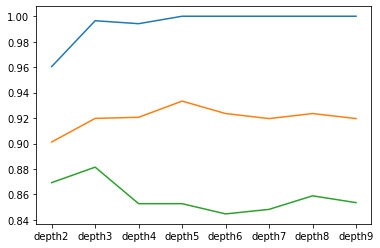

In [140]:
plt.plot(list(f1.keys()),list(f1.values()))

In [141]:
for key,value in cms.items():
    print(value[2])

[[258  37]
 [  6 143]]
[[260  35]
 [  4 145]]
[[257  38]
 [ 10 139]]
[[257  38]
 [ 10 139]]
[[258  37]
 [ 13 136]]
[[258  37]
 [ 12 137]]
[[262  33]
 [ 12 137]]
[[260  35]
 [ 12 137]]


In [105]:
for key,value in cms.items():
    print(value[1])

[[1706   17]
 [   7  183]]
[[1711   12]
 [   6  184]]
[[1708   15]
 [   9  181]]
[[1709   14]
 [  10  180]]
[[1711   12]
 [  11  179]]


In [19]:
len(data.F3)

0

In [25]:
from sklearn.model_selection import train_test_split,RandomizedSearchCV

In [28]:
param_distribs={'learning_rate':np.arange(0.1,1,0.1),
                'max_depth':[4,6,8,10],
               'reg_lambda':np.arange(1,50),
                #'reg_alpha':np.arange(0,30),
               'subsample':np.arange(0.5,1,0.1)}
grid_search_params = {'estimator': xgb_model,
                      'param_grid': params_search,  
                      'cv': ps,                     
                      'n_jobs': -1,  
                      'verbose': 32}
rnd_search_cv=RandomizedSearchCV(model,param_distribs,n_iter=10)

5746

In [98]:
indf=F==files[6]

In [102]:
sum((Y[~indf])==1)

104

In [138]:
sum(y_train==6)

93